In [248]:
from utils.network_analysis import *
from networkx.algorithms import bipartite
import textwrap

## **1. Network summary statistics**

#### **1.1 Read Network edgelist**

In [249]:
# Set filepath to edgelist of network to study
congress_edgelist_path = 'data/processed/edgelists/combined_edgelist_kout1_kin1.csv'
house_edgelist_path = 'data/processed/edgelists/house_edgelist_kout1_kin1.csv'
senate_edgelist_path = 'data/processed/edgelists/senate_edgelist_kout1_kin1.csv'

In [250]:
# Read in edgelists as networkx graph objects
fh = open(house_edgelist_path, "rb")
G_house = bipartite.read_edgelist(fh, delimiter=',')
fh.close()

fs = open(senate_edgelist_path, "rb")
G_senate = bipartite.read_edgelist(fs, delimiter=',')
fs.close()

fc = open(congress_edgelist_path, "rb")
G_congress = bipartite.read_edgelist(fc, delimiter=',')
fc.close()
# Check networks are bipartite
print('House network is bipartite' if nx.is_bipartite(G_house) else 'House network is not bipartite')
print('Senate network is bipartite' if nx.is_bipartite(G_senate) else 'Senate network is not bipartite')
print('Senate network is bipartite' if nx.is_bipartite(G_congress) else 'Senate network is not bipartite')

House network is bipartite
Senate network is bipartite
Senate network is bipartite


In [243]:
# Read House and Senate following dataframes
master_following_house = pd.read_csv('data/interim/house_master_following_table.csv')
master_following_senate = pd.read_csv('data/interim/senate_master_following_table.csv')
master_following_all = pd.read_csv('data/interim/congress_master_following_table.csv')

In [244]:
"""
# Add node attributes

# House congress members
house_attr_members = master_following_house.drop(['followee', 'followee_created_at', 'followee_followers_count', 'followee_following_count'], axis=1).drop_duplicates()
house_attr_members_dct = {}
for dct in house_attr_members.to_dict(orient='records'):
    congressperson = dct['congressperson']
    dct.pop('congressperson')
    house_attr_members_dct[congressperson] = dct

# House followees
house_attr_followees = master_following_house[['followee', 'followee_created_at', 'followee_followers_count', 'followee_following_count']].drop_duplicates(subset=['followee'])
house_attr_followees_dct = {}
for dct in house_attr_followees.to_dict(orient='records'):
    followee = dct['followee']
    dct.pop('followee')
    house_attr_followees_dct[followee] = dct


# Senate congress members
senate_attr_members = master_following_senate.drop(['followee', 'followee_created_at', 'followee_followers_count', 'followee_following_count'], axis=1).drop_duplicates()
senate_attr_members_dct = {}
for dct in senate_attr_members.to_dict(orient='records'):
    congressperson = dct['congressperson']
    dct.pop('congressperson')
    senate_attr_members_dct[congressperson] = dct

# Senate followees
senate_attr_followees = master_following_senate[['followee', 'followee_created_at', 'followee_followers_count', 'followee_following_count']].drop_duplicates(subset=['followee'])
senate_attr_followees_dct = {}
for dct in senate_attr_followees.to_dict(orient='records'):
    followee = dct['followee']
    dct.pop('followee')
    senate_attr_followees_dct[followee] = dct

# Add node attribudes to both House and Senate networks
nx.set_node_attributes(G_house, house_attr_members_dct)
nx.set_node_attributes(G_house, house_attr_followees_dct)

nx.set_node_attributes(G_senate, senate_attr_members_dct)
nx.set_node_attributes(G_senate, senate_attr_followees_dct)
"""

"\n# Add node attributes\n\n# House congress members\nhouse_attr_members = master_following_house.drop(['followee', 'followee_created_at', 'followee_followers_count', 'followee_following_count'], axis=1).drop_duplicates()\nhouse_attr_members_dct = {}\nfor dct in house_attr_members.to_dict(orient='records'):\n    congressperson = dct['congressperson']\n    dct.pop('congressperson')\n    house_attr_members_dct[congressperson] = dct\n\n# House followees\nhouse_attr_followees = master_following_house[['followee', 'followee_created_at', 'followee_followers_count', 'followee_following_count']].drop_duplicates(subset=['followee'])\nhouse_attr_followees_dct = {}\nfor dct in house_attr_followees.to_dict(orient='records'):\n    followee = dct['followee']\n    dct.pop('followee')\n    house_attr_followees_dct[followee] = dct\n\n\n# Senate congress members\nsenate_attr_members = master_following_senate.drop(['followee', 'followee_created_at', 'followee_followers_count', 'followee_following_count']

#### **1.2 Network summary statistics**

In [245]:
# Print summary stats of House network
print('House of Representatives following network:')
bipartiteNetworkSummary(G_house, left_label='B', right_label='C')

House of Representatives following network:
------------------------------------------
| Network Property       | Value           |
|------------------------------------------|
| #. of nodes            | 116828          |
| #. of edges            | 205737          |
|------------------------------------------|
| #. of B nodes          | 109             |
| Avg. B node degree     | 1887.5          |
| Max B degree           | 9146            |
| Min B degree           | 4               |
|------------------------------------------|
| #. of C nodes          | 116719          |
| Avg. C node degree     | 1.76            |
| Max C degree           | 81              |
| Min C degree           | 1               |
------------------------------------------


In [246]:
# Print summary stats of Senate network
print('The Senate following network:')
bipartiteNetworkSummary(G_senate, left_label='B', right_label='C')

The Senate following network:
------------------------------------------
| Network Property       | Value           |
|------------------------------------------|
| #. of nodes            | 58784           |
| #. of edges            | 79837           |
|------------------------------------------|
| #. of B nodes          | 55              |
| Avg. B node degree     | 1451.58         |
| Max B degree           | 11966           |
| Min B degree           | 3               |
|------------------------------------------|
| #. of C nodes          | 58729           |
| Avg. C node degree     | 1.36            |
| Max C degree           | 39              |
| Min C degree           | 1               |
------------------------------------------


In [247]:
# Print summary stats of congress network
print('The congress following network:')
bipartiteNetworkSummary(G_congress, left_label='B', right_label='C')

The congress following network:
------------------------------------------
| Network Property       | Value           |
|------------------------------------------|
| #. of nodes            | 156364          |
| #. of edges            | 285574          |
|------------------------------------------|
| #. of B nodes          | 164             |
| Avg. B node degree     | 1741.3          |
| Max B degree           | 11966           |
| Min B degree           | 3               |
|------------------------------------------|
| #. of C nodes          | 156200          |
| Avg. C node degree     | 1.83            |
| Max C degree           | 120             |
| Min C degree           | 1               |
------------------------------------------


## **2. Degree Distributions**

In [234]:
def plotDegreeDistribution2(nodes_b,nodes_c, label='nodes', title='title', colours=['green','orange'], figsize=(12,5),save=False, savename='congress', fileformat='pdf'):
    """Calculate and plot degree distribution for a node set, return degree distribution table. Plot both linear-linear scale and log-log scale

    Args:
        - nodes (dict) : dictionary object containing {node : degree} information for all nodes in set
        - label (str) : legend label for node set
        - color (str) : color of plot markers
        - save (bool) : flag to save figure (default False)
    Returns:
        - degree_distribution_table (pandas.core.frame.DataFrame) : python (sorted) dataframe with degree / node count columns for node set
    """

    # Calculate degree distribution
    degree_sequence_b = list(nodes_b.values())
    histogram_count_b = Counter(degree_sequence_b)
    degree_distribution_table_b = pd.DataFrame.from_records([(i, histogram_count_b[i]) for i in histogram_count_b], columns = ['Degree', 'Node_count'])
    total_nodes_b = degree_distribution_table_b['Node_count'].sum()
    degree_distribution_table_b['pk'] = degree_distribution_table_b['Node_count'] / total_nodes_b

        # Calculate degree distribution
    degree_sequence_c = list(nodes_c.values())
    histogram_count_c = Counter(degree_sequence_c)
    degree_distribution_table_c = pd.DataFrame.from_records([(i, histogram_count_c[i]) for i in histogram_count_c], columns = ['Degree', 'Node_count'])
    total_nodes_c = degree_distribution_table_c['Node_count'].sum()
    degree_distribution_table_c['pk'] = degree_distribution_table_c['Node_count'] / total_nodes_c

    def wrap_labels(text, width):
        return '\n'.join(textwrap.wrap(text, width))

    # Plot degree distribution
    with plt.style.context("ggplot"):
        fig = plt.figure(figsize=figsize)

        plt.subplot(1,2,1)
        plt.loglog(degree_distribution_table_b.Degree, degree_distribution_table_b.pk, linestyle='', marker='X', color=colours[0],label=wrap_labels('congressmember nodes',15))
        plt.xlabel('$k^{\\text{out}}$')
        plt.ylabel('$P(k^{\\text{out}})$')
        plt.legend(loc='upper left')

        x = np.log(degree_distribution_table_c.Degree)
        y = np.log(degree_distribution_table_c.pk)
        fit_coefficients = np.polyfit(x,y,deg=1)
        degree_exponent = fit_coefficients[0]
        intercept = fit_coefficients[1]
        print(degree_exponent)
 

        plt.subplot(1,2,2)
        plt.loglog(degree_distribution_table_c.Degree, degree_distribution_table_c.pk, linestyle='', marker='X', color=colours[1],label=wrap_labels('user nodes',15))
        plt.loglog(degree_distribution_table_c.Degree, [np.exp(intercept)*(i**degree_exponent) for i in degree_distribution_table_c.Degree], marker='',color='darkorange', linewidth=1, linestyle='-', zorder=3)
        plt.annotate(r'$\alpha={}$'.format(np.round(-degree_exponent,2)),(np.max(degree_distribution_table_c.Degree)*0.06, 0.1), color='darkorange', fontsize=14)
        plt.xlabel('$k^{\\text{in}}$')
        plt.ylabel('$P(k^{\\text{in}})$')
        plt.legend()


        fig.patch.set_edgecolor('black')  # Set border color
        fig.patch.set_linewidth(1) 

        if save:
            current_ts = datetime.datetime.now().strftime("%Y_%m_%d__%H_%M_%S")
            plt.savefig('results/figures/degree_distribution_{}_{}'.format(savename,current_ts), bbox_inches='tight', dpi=400, format=fileformat)

        plt.show()

    return degree_distribution_table_b, degree_distribution_table_c

#### **2.1 B Out-degree, C In-degree**

-2.3590839291991883


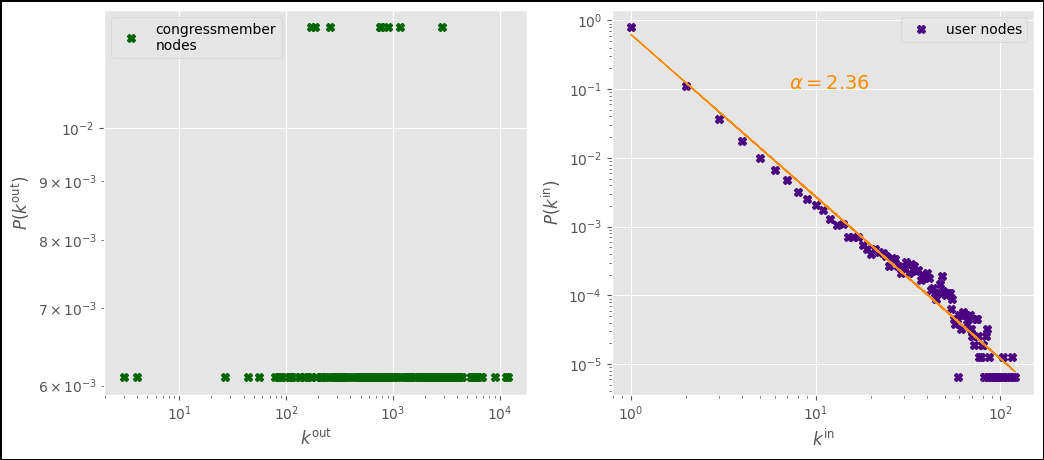

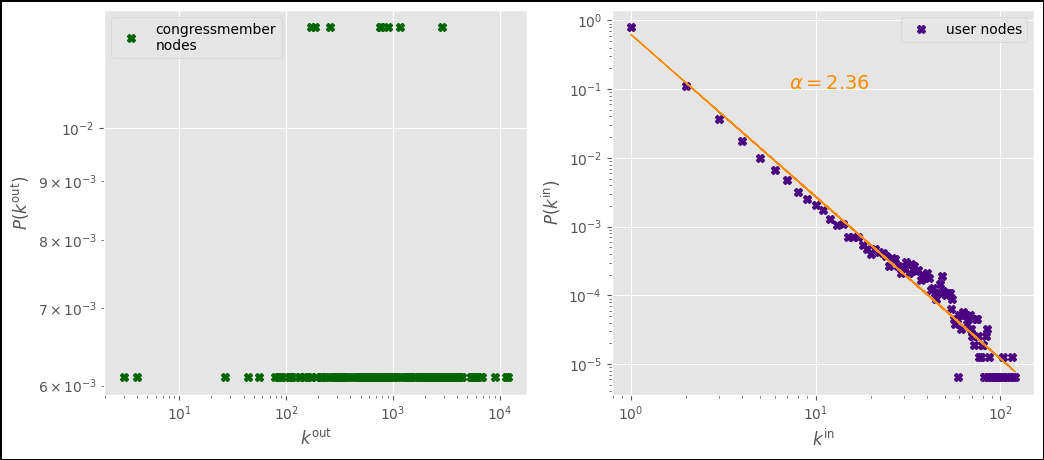

In [235]:
# Get right / left node sets
B_nodes_congress, C_nodes_congress = bipartiteSets(G_congress)
congress_distr = plotDegreeDistribution2(B_nodes_congress, C_nodes_congress, label='congress', colours = ['darkgreen','indigo'], figsize=(12,5), savename = 'congress', save=False)

-2.402977205772546


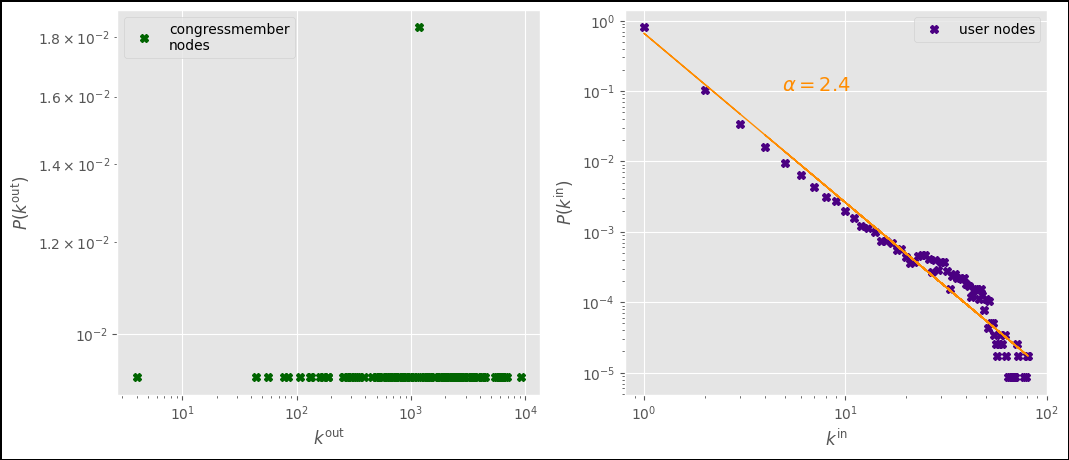

In [238]:
# Get right / left node sets
B_nodes_house, C_nodes_house = bipartiteSets(G_house)
house_distr = plotDegreeDistribution2(B_nodes_house, C_nodes_house, label='House', colours = ['darkgreen','indigo'], figsize=(12,5), savename='house', save=False)

-2.5348820683282867


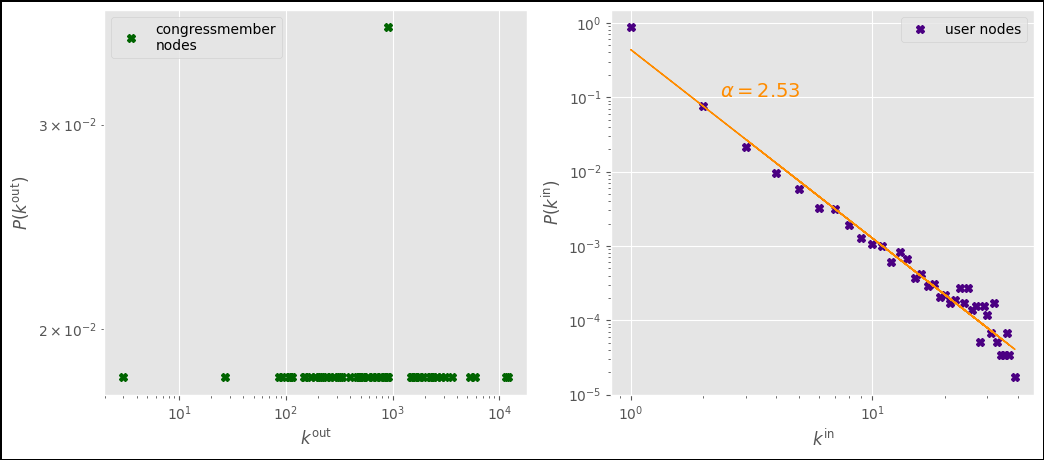

In [239]:
# Get right / left node sets
B_nodes_senate, C_nodes_senate = bipartiteSets(G_senate)
senate_distr = plotDegreeDistribution2(B_nodes_senate, C_nodes_senate, label='senate', colours = ['darkgreen','indigo'], figsize=(12,5), savename='senate', save=False)

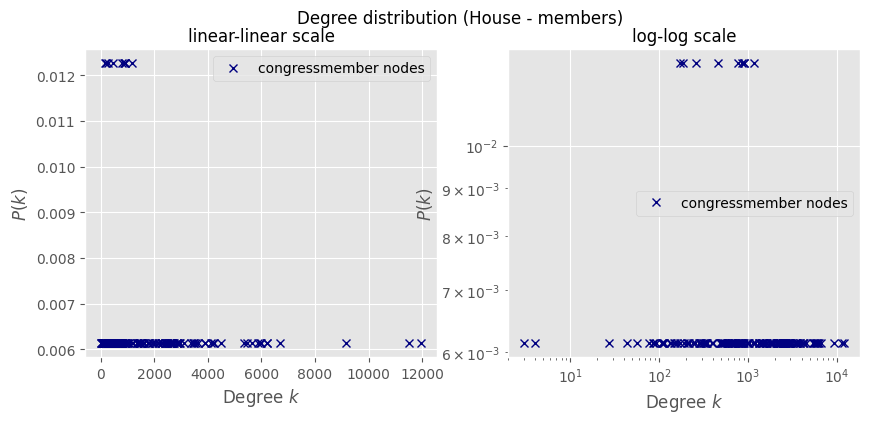

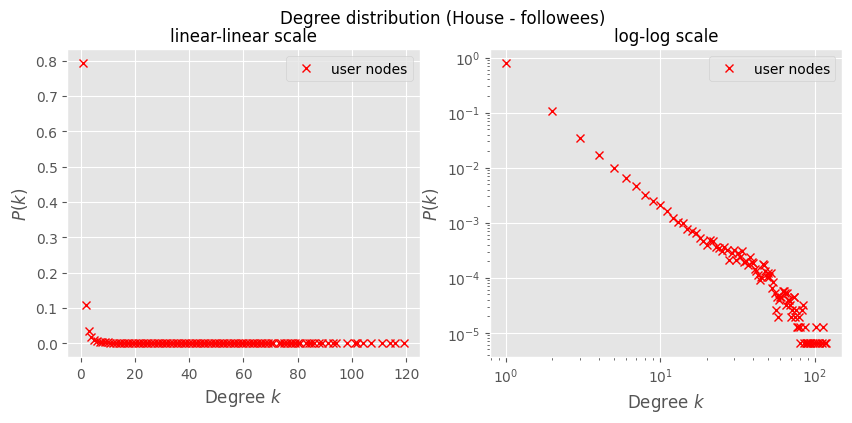

In [21]:
# Degree distributions for House congress members and followees

# Get right / left node sets
B_nodes_house, C_nodes_house = bipartiteSets(G_congress)

# Plot right / left degree distributions
B_nodes_house_dist = plotDegreeDistribution(B_nodes_house, label='congressmember nodes',title='Degree distribution (House - members)', color='navy', figsize=(10,4))
C_nodes_house_dist = plotDegreeDistribution(C_nodes_house, label='user nodes',title='Degree distribution (House - followees)',color='red', figsize=(10,4))

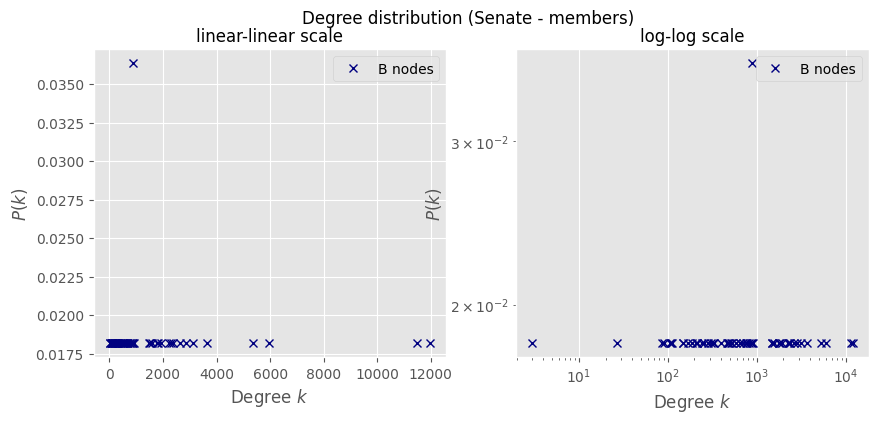

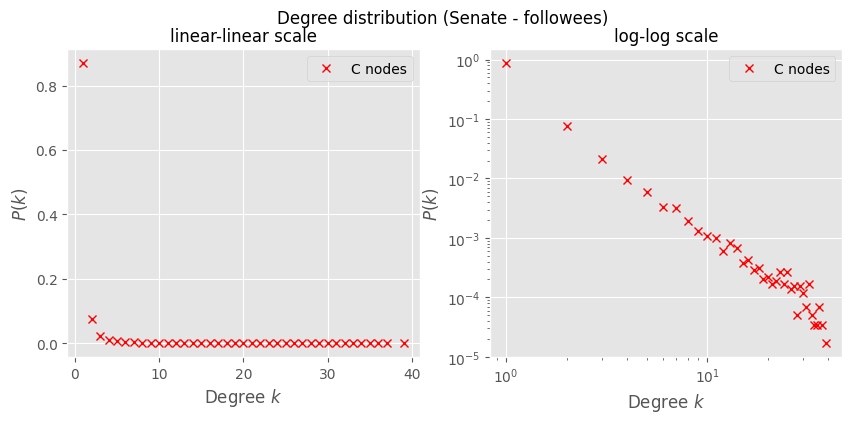

In [20]:
# Degree distributions for Senate congress members and followees

# Get right / left node sets
B_nodes_senate, C_nodes_senate = bipartiteSets(G_senate)

# Plot right / left degree distributions
B_nodes_senate_dist = plotDegreeDistribution(B_nodes_senate, label='B nodes',title='Degree distribution (Senate - members)', color='navy', figsize=(10,4))
C_nodes_senate_dist = plotDegreeDistribution(C_nodes_senate, label='C nodes',title='Degree distribution (Senate - followees)',color='red', figsize=(10,4))

#### **2.2 B,C degree rank vs. rank distributions**


1.  X:  183 ranks
          Y1:  1st-level k = degree (B->C) of the congressperson of rank x
          Y2: 2nd-level k (which is the sum of degree (C -> D) for the k neighbours (C)) of the congressperson (B) of rank x


In [11]:
house_ranked = master_following_house.groupby('congressperson').agg({'followee' : 'count', 'followee_following_count' : 'sum'})
house_ranked['degree_rank'] = house_ranked['followee'].rank(ascending=False)
house_ranked.sort_values(by='followee', ascending=False).head(10)


senate_ranked = master_following_senate.groupby('congressperson').agg({'followee' : 'count', 'followee_following_count' : 'sum'})
senate_ranked['degree_rank'] = senate_ranked['followee'].rank(ascending=False)
senate_ranked.sort_values(by='followee', ascending=False).head(10)

,followee,followee_following_count,degree_rank
congressperson,,,
johncornyn,11967,38422722,1.0
chuckgrassley,11505,27568047,2.0
royblunt,5949,22348543,3.0
davidvitter,5350,22388022,4.0
chriscoons,3638,15475869,5.0
senatorcardin,3117,30345425,6.0
jerrymoran,2862,9820727,7.0
senatorshaheen,2623,8331287,8.0
senatorleahy,2379,8059587,9.0


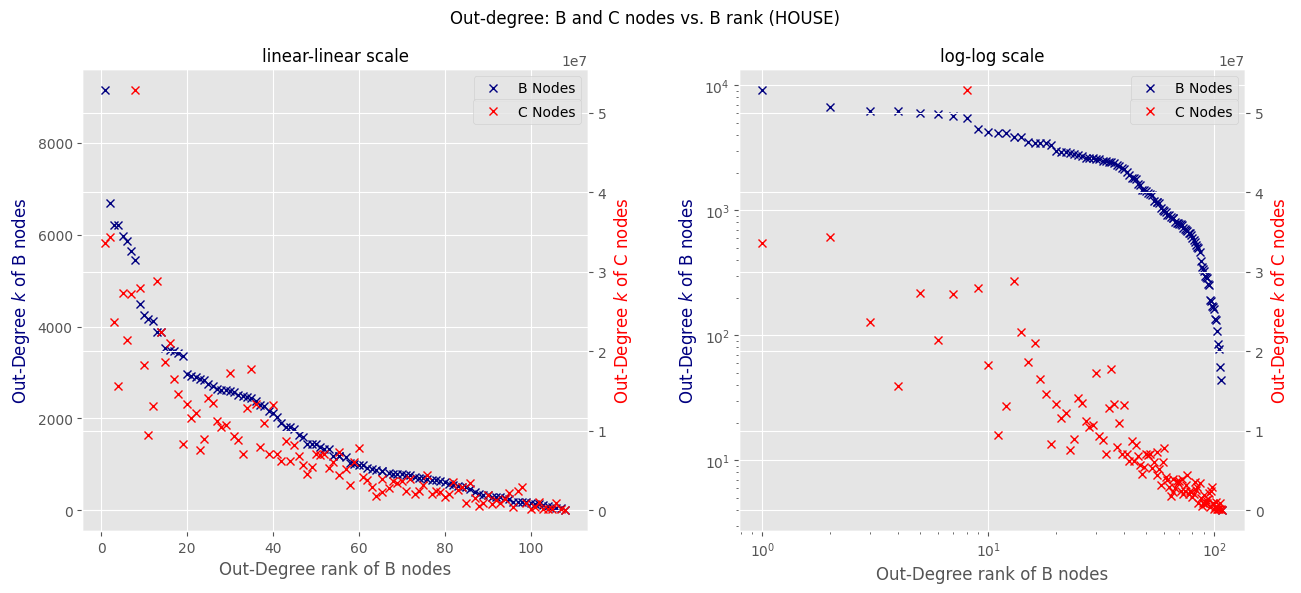

In [12]:
import matplotlib.pyplot as plt

df = house_ranked
# Plot degree vs. degree rank
with plt.style.context("ggplot"):

    fig = plt.figure(figsize=(15,6))

    # First subplot with a secondary y-axis
    ax1 = plt.subplot(1, 2, 1)
    ax1.plot(df['degree_rank'], df['followee'], linestyle='', marker='x', color='navy', label='B Nodes')
    ax1.set_xlabel('Out-Degree rank of B nodes')
    ax1.set_ylabel('Out-Degree $k$ of B nodes', color='navy')
    ax1.set_title('linear-linear scale', size=12)
    ax1.legend()

    # Create secondary y-axis for the first subplot
    ax2 = ax1.twinx()
    ax2.plot(df['degree_rank'], df['followee_following_count'], linestyle='' ,marker='x', color='r', label='C Nodes')
    ax2.set_ylabel('Out-Degree $k$ of C nodes', color='red')
    ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.95))

    # Second subplot with a secondary y-axis
    ax3 = plt.subplot(1, 2, 2)
    ax3.loglog(df['degree_rank'], df['followee'], linestyle='', marker='x', color='navy', label='B Nodes')
    ax3.set_xlabel('Out-Degree rank of B nodes')
    ax3.set_ylabel('Out-Degree $k$ of B nodes', color='navy')
    ax3.set_title('log-log scale', size=12)
    ax3.legend()

    # Create secondary y-axis for the second subplot
    ax4 = ax3.twinx()
    ax4.plot(df['degree_rank'], df['followee_following_count'], linestyle='',  marker='x',color='r', label='C Nodes')
    ax4.set_ylabel('Out-Degree $k$ of C nodes', color='red')
    ax4.legend(loc='upper right', bbox_to_anchor=(1, 0.95))

    fig.subplots_adjust(wspace=0.3)
    plt.suptitle('Out-degree: B and C nodes vs. B rank (HOUSE)')

    plt.show()



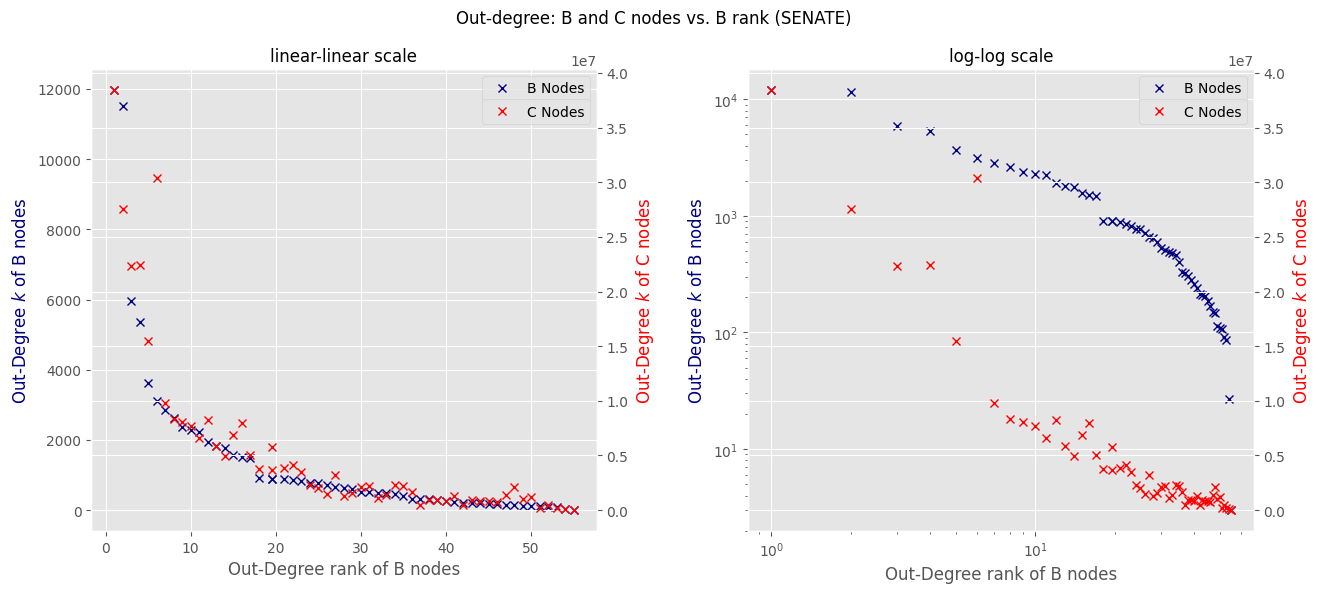

In [13]:
import matplotlib.pyplot as plt

df = senate_ranked
# Plot degree vs. degree rank
with plt.style.context("ggplot"):

    fig = plt.figure(figsize=(15,6))

    # First subplot with a secondary y-axis
    ax1 = plt.subplot(1, 2, 1)
    ax1.plot(df['degree_rank'], df['followee'], linestyle='', marker='x', color='navy', label='B Nodes')
    ax1.set_xlabel('Out-Degree rank of B nodes')
    ax1.set_ylabel('Out-Degree $k$ of B nodes', color='navy')
    ax1.set_title('linear-linear scale', size=12)
    ax1.legend()

    # Create secondary y-axis for the first subplot
    ax2 = ax1.twinx()
    ax2.plot(df['degree_rank'], df['followee_following_count'], linestyle='' ,marker='x', color='r', label='C Nodes')
    ax2.set_ylabel('Out-Degree $k$ of C nodes', color='red')
    ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.95))

    # Second subplot with a secondary y-axis
    ax3 = plt.subplot(1, 2, 2)
    ax3.loglog(df['degree_rank'], df['followee'], linestyle='', marker='x', color='navy', label='B Nodes')
    ax3.set_xlabel('Out-Degree rank of B nodes')
    ax3.set_ylabel('Out-Degree $k$ of B nodes', color='navy')
    ax3.set_title('log-log scale', size=12)
    ax3.legend()

    # Create secondary y-axis for the second subplot
    ax4 = ax3.twinx()
    ax4.plot(df['degree_rank'], df['followee_following_count'], linestyle='',  marker='x',color='r', label='C Nodes')
    ax4.set_ylabel('Out-Degree $k$ of C nodes', color='red')
    ax4.legend(loc='upper right', bbox_to_anchor=(1, 0.95))

    fig.subplots_adjust(wspace=0.3)
    plt.suptitle('Out-degree: B and C nodes vs. B rank (SENATE)')

    plt.show()

2. Distribution of degree (C -> D) for C nodes

In [14]:
C_nodes_following_house = master_following_house[['followee', 'followee_following_count']].drop_duplicates(subset=['followee'])
C_nodes_following_senate = master_following_senate[['followee', 'followee_following_count']].drop_duplicates(subset=['followee'])

C_nodes_following_house_dict = dict(zip(C_nodes_following_house['followee'], C_nodes_following_house['followee_following_count']))
C_nodes_following_senate_dict = dict(zip(C_nodes_following_senate['followee'], C_nodes_following_senate['followee_following_count']))

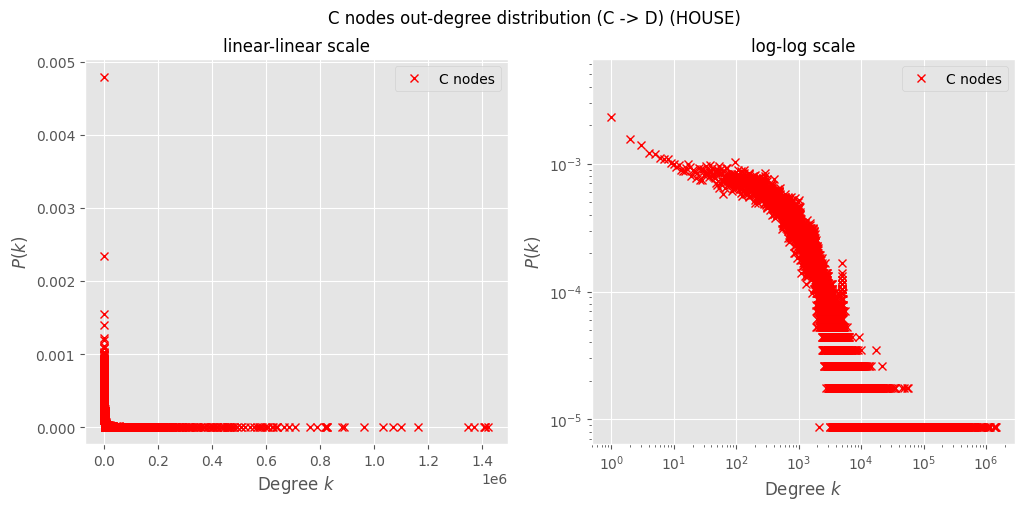

In [15]:
C_h = plotDegreeDistribution(C_nodes_following_house_dict, label='C nodes',title='C nodes out-degree distribution (C -> D) (HOUSE)', color='red', figsize=(12,5))

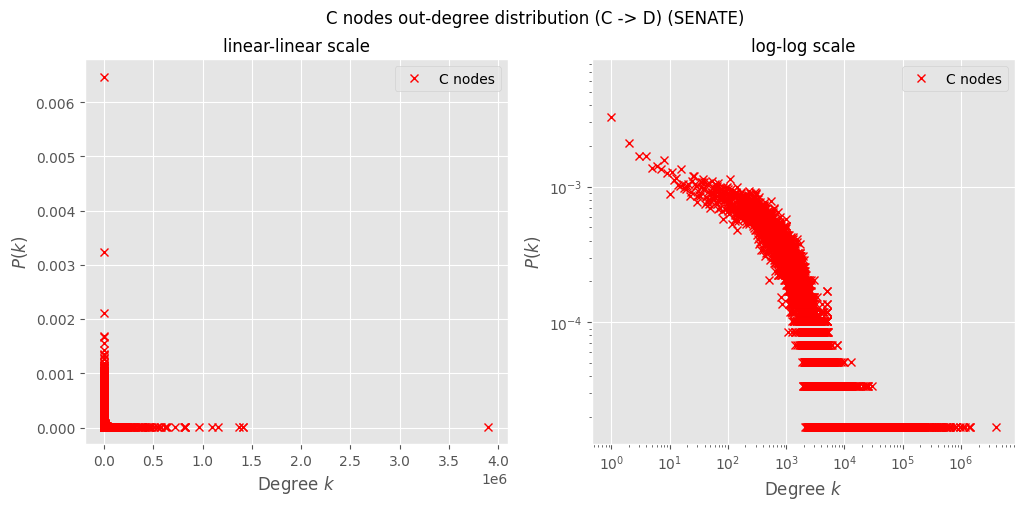

In [16]:
C_s = plotDegreeDistribution(C_nodes_following_senate_dict, label='C nodes',title='C nodes out-degree distribution (C -> D) (SENATE)', color='red', figsize=(12,5))

## **3 Projection networks !(TO-DO)!**

In [17]:
'''
# Get left / right nodes
right_nodes_list = list(right_nodes.keys())
left_nodes_list = list(left_nodes.keys())

# Create left / right projection networks
right_projection = bipartite.projected_graph(G_house, right_nodes_list, multigraph=True)
left_projection = bipartite.projected_graph(G_house, left_nodes_list, multigraph=True)

# Plot degree distributions of left / right projection networks
left_projection_dist = plotDegreeDistribution(dict(left_projection.degree()), label='left nodes projection',color='navy')
right_projection_dist = plotDegreeDistribution(dict(right_projection.degree()), label='right nodes projection',color='red')
'''

"\n# Get left / right nodes\nright_nodes_list = list(right_nodes.keys())\nleft_nodes_list = list(left_nodes.keys())\n\n# Create left / right projection networks\nright_projection = bipartite.projected_graph(G_house, right_nodes_list, multigraph=True)\nleft_projection = bipartite.projected_graph(G_house, left_nodes_list, multigraph=True)\n\n# Plot degree distributions of left / right projection networks\nleft_projection_dist = plotDegreeDistribution(dict(left_projection.degree()), label='left nodes projection',color='navy')\nright_projection_dist = plotDegreeDistribution(dict(right_projection.degree()), label='right nodes projection',color='red')\n"